<a href="https://colab.research.google.com/github/alirezash97/BRATS2015/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!sudo apt-get install python-pip python-numpy python-scipy libboost-python-dev build-essential

In [0]:
!sudo pip install nibabel pydicom medpy

In [0]:
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"alirezashafaei97","key":"9cb262aa0c5658ffc4eb45857c41903c"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!mkdir ~/.kaggle
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/brain-tumor-segmentation-in-mri-brats-2015 -p /content



In [0]:
!unzip /content/brain-tumor-segmentation-in-mri-brats-2015.zip -d /content/BTS

In [0]:
import glob, os
HGG = glob.glob('/content/BTS/train/HGG/**/*.mha', recursive=True)
LGG = glob.glob('/content/BTS/train/LGG/**/*.mha', recursive=True)

In [6]:
print(len(HGG))
print(len(LGG))

1100
270


In [0]:
T1_HGG = []
S_HGG = []
T1_LGG = []
S_LGG = []
for item in HGG:
  if 'T1.' in item:
    T1_HGG.append(item)
  elif 'O.OT.' in item:
    S_HGG.append(item)
  else:
    pass

# for item in LGG:
#   if 'T1.' in item:
#     T1_LGG.append(item)
#   elif 'O.OT.' in item:
#     S_LGG.append(item)
#   else:
#     pass


In [8]:
print(len(T1_HGG))
print(len(S_HGG))
# print(len(T1_LGG))
# print(len(S_LGG))

220
215


In [0]:
T1_HGG_validation = T1_HGG[199:215]
S_HGG_validation = S_HGG[199:]
T1_HGG = T1_HGG[:199]
S_HGG = S_HGG[:199]

In [0]:
from medpy.io import load
import numpy as np


def generator(samples, targets, batch_size=2):
    


    num_samples = len(samples)
    while True: # Loop forever so the generator never terminates

 
        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size &lt;= num_samples]
        for offset in range(0, num_samples, batch_size):
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset+batch_size]
            batch_targets = targets[offset:offset+batch_size]
 
            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
 
            # For each example
            for batch_sample in batch_samples:
                # Load image (X)
                temp, header = load(batch_sample)
                tempp = np.zeros((48, 240, 240, 3))
                for i in range (1, 49):
                  tempp[i-1, :, :, :] = temp[:, :, i*3:(i+1)*3]

                X_train.append(tempp)

            for batch_target in batch_targets:
                # Load image (X)
                temp, header = load(batch_target)
                tempp = np.zeros((48, 240, 240, 3))
                for i in range (1, 49):
                  tempp[i-1, :, :, :] = temp[:, :, i*3:(i+1)*3]

                y_train.append(tempp)
 
            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)
 
            # The generator-y part: yield the next training batch            
            yield X_train, y_train



  

In [0]:
train_generator = generator(T1_HGG, S_HGG, batch_size=1)
validation_generator = generator(T1_HGG_validation, S_HGG_validation, batch_size=1)

In [0]:
# from medpy.io import load
# import matplotlib.pyplot as plt
# import numpy as np



# trainset_HGG = np.zeros((10, 240, 240, 155))
# targetset_HGG = np.zeros((10, 240, 240, 155))
# # trainset_LGG = np.zeros((100, 240, 240, 155))


# # for index, dir_address in enumerate(HGG) :
  
# #   temp = load(dir_address)
# #   trainset_HGG[index, :, :, :] = np.array(temp)



# for index, dir_address in enumerate(T1_HGG) :
  
#   temp, header = load(dir_address)
#   trainset_HGG[index, :, :, :] = np.array(temp)

# for index, dir_address in enumerate(S_HGG) :
  
#   temp, header = load(dir_address)
#   targetset_HGG[index, :, :, :] = np.array(temp)



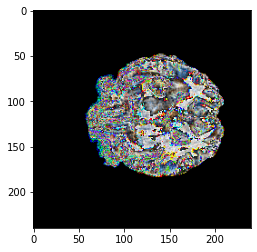

In [0]:

# plt.imshow((trainset_HGG[9, :, :, 70:73] * 255).astype(np.uint8))

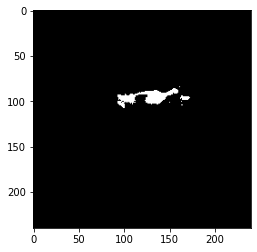

In [0]:
# plt.imshow(targetset_HGG[9, :, :, 92], cmap='gray')
# plt.imshow((targetset_HGG[12, :, :, 80:83] * 255).astype(np.uint8))

In [0]:
# import numpy as np
# import matplotlib.pyplot as plt

# def ploter(image_data, a, b):
#   fig=plt.figure(figsize=(10, 10))
#   columns = 4
#   rows = 5
#   counter = 0
#   for i in range(a, b):
#       counter += 1
#       img = image_data[:, :, i]
#       fig.add_subplot(rows, columns, counter)
#       plt.imshow(img, cmap='gray')
#   plt.show()


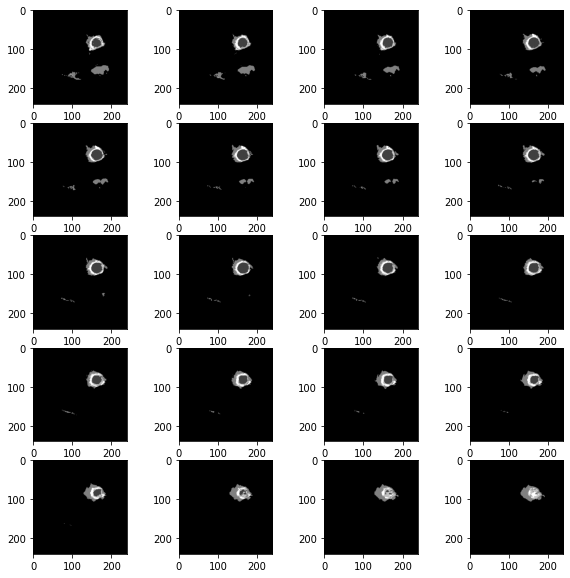

In [0]:

# ploter(targetset_HGG[12, :, :, :], 80, 100)


In [0]:
# print(trainset_HGG.shape)
# print(targetset_HGG.shape)

(50, 240, 240, 155)
(50, 240, 240, 155)


In [0]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(trainset_HGG, targetset_HGG, test_size=0.2)

In [0]:
pip install keras-segmentation

In [0]:
from keras.layers import Conv3D, Dropout, MaxPooling3D, concatenate, UpSampling3D

from keras import Model, Input

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.metrics import MeanIoU
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


prev_chance0, checker0 = (0.1, 0)
prev_chance1, checker1 = (0.1, 0)
prev_chance2, checker2 = (0.1, 0)



def unet(prev_chance0, checker0, prev_chance1, checker1, prev_chance2, checker2, pretrained_weights = None, input_size = (48, 240, 240, 3)):
    inputs = Input(input_size)
    conv1 = Conv3D(4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv3D(4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling3D(pool_size=(1, 2, 2))(conv1)
    conv2 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling3D(pool_size=(1, 2, 2))(conv2)
    conv3 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    
    #######
    prev_chance0, conv3, checker0 = Acid16(prev_chance0, conv3, checker0)
    # conv3 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    #######

    pool3 = MaxPooling3D(pool_size=(1, 2, 2))(conv3)
    conv4 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    
    #######
    prev_chance1, conv4, checker1 = Acid32(prev_chance1, conv4, checker1)
    # conv4 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    #######

    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling3D(pool_size=(1, 2, 2))(drop4)

    conv5 = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    
    ########
    prev_chance2, conv5, checker2 = Acid64(prev_chance2, conv5, checker2)
    # conv5 = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    ########
    
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv3D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (1, 2, 2))(drop5))
    merge6 = concatenate([drop4,up6], axis = -1)
    conv6 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv3D(16, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (1, 2, 2))(conv6))
    merge7 = concatenate([conv3,up7], axis = -1)
    conv7 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv3D(8, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (1, 2, 2))(conv7)) #
    merge8 = concatenate([conv2,up8], axis = -1)
    conv8 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv3D(8, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv3D(4, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling3D(size = (1, 2, 2))(conv8))
    merge9 = concatenate([conv1,up9], axis = -1)
    conv9 = Conv3D(4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv3D(4, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv3D(3, 1, activation = 'sigmoid')(conv9)

    model = Model(input=inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = soft_dice_loss, metrics = [dice_coefficient])
  
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [0]:
from keras import backend as K

def soft_dice_loss(y_true, y_pred, axis=(1, 2, 3), 
                   epsilon=0.00001):
  
    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true**2, axis=axis) + K.sum(y_pred**2, axis=axis) + epsilon
    dice_loss = 1 - K.mean((dice_numerator)/(dice_denominator))


    return dice_loss


def dice_coefficient(y_true, y_pred, axis=(1, 2, 3), 
                     epsilon=0.00001):

    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true, axis=axis) + K.sum(y_pred, axis=axis) + epsilon
    dice_coefficient = K.mean((dice_numerator)/(dice_denominator))
    
 
    return dice_coefficient


# def dice_coefficient(y_true, y_pred, smooth=1.):
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


# def dice_coefficient_loss(y_true, y_pred):
#     return 1-dice_coefficient(y_true, y_pred)

In [55]:
model = unet(prev_chance0, checker0, prev_chance1, checker1, prev_chance2, checker2)
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 48, 240, 240, 0                                            
__________________________________________________________________________________________________
conv3d_185 (Conv3D)             (None, 48, 240, 240, 328         input_9[0][0]                    
__________________________________________________________________________________________________
conv3d_186 (Conv3D)             (None, 48, 240, 240, 436         conv3d_185[0][0]                 
__________________________________________________________________________________________________
max_pooling3d_33 (MaxPooling3D) (None, 48, 120, 120, 0           conv3d_186[0][0]                 
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# callback
my_callbacks = [
        EarlyStopping(monitor='val_loss', patience=6),
        ModelCheckpoint(filepath='/content/drive/My Drive/BRATS2020/AcidModel.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=False)
]




# Fit model using generator
history = model.fit_generator(train_generator, steps_per_epoch=199, epochs=20, validation_data=validation_generator, validation_steps=16, callbacks=my_callbacks)


# history = model.fit(X_train, y_train, epochs=40, batch_size=4, validation_data=(X_test, y_test))

Epoch 1/20
199/199 [==============================] - 5930s 30s/step - loss: 0.9133 - dice_coefficient: 0.0638 - val_loss: 0.8637 - val_dice_coefficient: 0.0767
Epoch 2/20
199/199 [==============================] - 6021s 30s/step - loss: 0.8712 - dice_coefficient: 0.1295 - val_loss: 0.8356 - val_dice_coefficient: 0.1965
Epoch 3/20
 10/199 [>.............................] - ETA: 1:34:15 - loss: 0.8455 - dice_coefficient: 0.1773

In [0]:
import numpy as np
import random



def Acid16(prev_chance, X, checker):

  if checker == 0:
    chance = random.uniform(0, 1)
    checker = 1
  else:
    chance = prev_chance
    checker = 0

  if chance > 0.8:
    X = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.8 > chance > 0.6:
    X = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.6 > chance > 0.4:
    X = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.4 > chance > 0.2:
    X = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.2 > chance :
    X = Conv3D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)

  return chance, X, checker

In [0]:
import numpy as np
import random



def Acid32(prev_chance, X, checker):

  if checker == 0:
    chance = random.uniform(0, 1)
    checker = 1
  else:
    chance = prev_chance
    checker = 0

  if chance > 0.8:
    X = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.8 > chance > 0.6:
    X = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.6 > chance > 0.4:
    X = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.4 > chance > 0.2:
    X = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.2 > chance :
    X = Conv3D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)

  return chance, X, checker

In [0]:
import numpy as np
import random



def Acid64(prev_chance, X, checker):

  if checker == 0:
    chance = random.uniform(0, 1)
    checker = 1
  else:
    chance = prev_chance
    checker = 0

  if chance > 0.8:
    X = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.8 > chance > 0.6:
    X = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.6 > chance > 0.4:
    X = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.4 > chance > 0.2:
    X = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)
  elif 0.2 > chance :
    X = Conv3D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(X)

  return chance, X, checker